<a href="https://colab.research.google.com/github/Aleksypruszkowski/Machine-Learning-MIMUW/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Linear and Logistic Regression
### Author: Aleksy Pruszkowski


### We start off with generating the same synthetic dataset as in class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

np.random.seed(13)
beta_0 = -1
beta_1 = 2
X = np.linspace(-3, 3, 1000).reshape(-1, 1)
logit = beta_0 + beta_1 * X.flatten()
probabilities = 1 / (1 + np.exp(-logit))
y = np.random.binomial(1, probabilities)

#### Let's divide the dataset into training (60%), validation (20%) and testing (20%) sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

#### Receiver operating characteristic (ROC) plots the true positive rate against the false positive rate. To assess the quality of the model we compute the accuracy (number of correctly predicted labels divided by the number of observations) and AUC (area under the ROC curve)

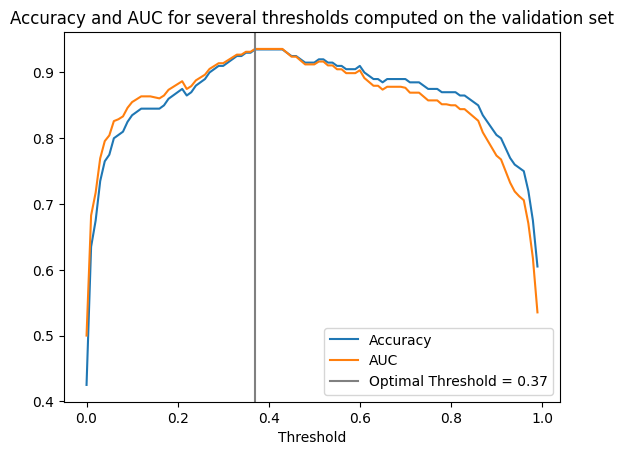

In [ ]:
accuracies = []
AUC = []
l = list(range(0,100))
threshold_list = [x/100 for x in l]
for i in threshold_list:
  logistic_model = LogisticRegression()
  logistic_model.fit(X_train, y_train)
  probs = logistic_model.predict_proba(X_val)
  threshold = i
  new_preds = (probs[:, 1] > threshold).astype(int)
  AUC.append(roc_auc_score(y_val, new_preds))
  a = accuracy_score(y_val, new_preds)
  accuracies.append(a)
plt.plot(threshold_list, accuracies,label="Accuracy")
plt.plot(threshold_list, AUC, label="AUC")
np.argmax(accuracies)
plt.axvline(x = np.argmax(accuracies)/100, color = 'grey',label=f'Optimal Threshold = {np.argmax(accuracies)/100}')
plt.xlabel("Threshold")
plt.title("Accuracy and AUC for several thresholds computed on the validation set")
plt.legend()
plt.show()

#### The highest AUC has the model with threshold equal to 0.37. Let's compute model metrics on the testing set.

AUC: 0.95
Accuracy: 0.90
Precision: 0.86
Recall (Sensitivity): 0.92
F1-Score: 0.89
Specificity: 0.88


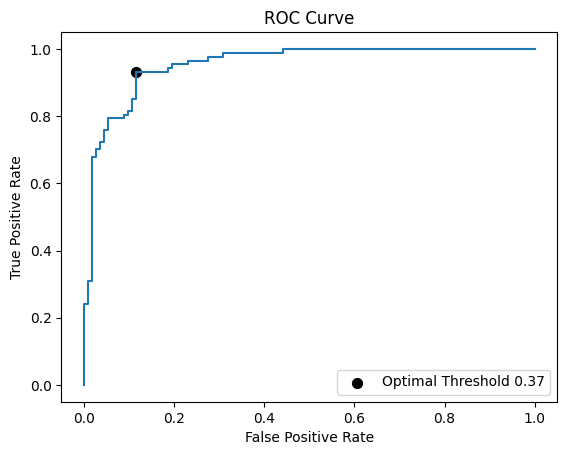

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
probs = logistic_model.predict_proba(X_test)
optimal_idx=22
optimal_threshold = thresholds[optimal_idx]
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
new_preds = (probs[:, 1] > optimal_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, new_preds).ravel()
accuracy = accuracy_score(y_test, new_preds)
precision = precision_score(y_test, new_preds)
recall = recall_score(y_test, new_preds)
f1 = f1_score(y_test, new_preds)
specificity = tn / (tn + fp)
print(f"AUC: {roc_auc_score(y_test, probs[:,1]):.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")
plt.plot(fpr, tpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='black', s=50, label=f'Optimal Threshold 0.37')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

#### The graph above shows that in order to increase the TPR (sensitivity) we need to increase FPR (1-specificity) as well. In some cases (like cancer diagnosis) we prefer higher sensitivity (false negative test result is worse than false positive). If we consider spam email detection, we prefer higher specificity (not marking an important email as spam)